In [1]:
## HWK2 using PCA for Stock Prices
# 1. Get historical stock price data from yahoo for Dow Jones 30 constituents, 
# 2. Compute the cov matrix from scaled data
# 3. Use np.linalg.eig(cov_mat)
# 4. Compute and examine eigen_vectors and eigen_values
#
# More challenging problems
# 5. Try to identify the 1st principle component, what do you think it is?
# 6. Predict next days returns for 'AAPL' using all your data and all your algos
#    use 10-fold cross validation
# 7. Would you trade this ML Stock prediction model? 
#   Why or why not? Did you make any inadvertent 'cheats'? 

In [ ]:
#>>> import csv
#>>> with open('Dow Jones 30.csv', 'rb') as csvfile:
#...     dow = csv.reader(csvfile, delimiter=' ', quotechar='|')


In [9]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def get_prices(ticks, st, ed):
# This function gets Adjusted Closing prices from Yahoo Finance
# returns a DataFrame. Inputs are ticks (list of tickers), st (start date), ed (end date)
    for idx, ticker in enumerate(ticks):
        print(ticker)
        f = web.DataReader(ticker, 'yahoo', st, ed)['Adj Close']
        f.name = ticker
        if idx==0:
            df = f
        else:
            df = pd.concat([df, f], axis=1)
        return df

In [15]:
tickers = [['MMM','AXP','AAPL','BA','CAT','CVX','CSCO','KO','DIS','DD',
          'XOM','GE','GS','HD','IBM','INTC','JNJ','JPM','MCD','MRK','MSFT',
          'NKE','PFE','PG','TRV','UTX','UNH','VZ','V','WMT']]


start = dt.datetime(2011, 11, 7)
end   = dt.datetime.today()

df = get_prices(tickers, start, end)
df = df.pct_change().dropna()

X = df

# scale X's
sc = StandardScaler() # x(i)_new = (x(i) - mean(x))/std(x)
#sc = MinMaxScaler()   # x(i)_new = (x(i) - min(x))/(max(x)-min(x))

sc.fit(X)
X_std = sc.transform(X)
print(X_std.shape)
print(' ')
print('Standard deviation of the columns:', X_std.std(axis=0))
print('Mean of columns: ', X_std.mean(axis=0))

cov_mat = np.cov(X_std.T) # careful here need to transpose "X" 
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenValues \n%s' % eigen_vals)

['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'DD', 'XOM', 'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'V', 'WMT']
(1257, 30)
 
Standard deviation of the columns: [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
Mean of columns:  [  2.82634342e-18   1.13053737e-17  -1.69580605e-17   2.82634342e-18
  -1.27185454e-17  -2.82634342e-18  -2.82634342e-17   2.54370908e-17
  -8.47903026e-18   2.82634342e-18   9.89220197e-18  -1.13053737e-17
   1.34251312e-17   1.41317171e-17  -1.83712322e-17  -4.23951513e-18
  -2.22574544e-17   1.41317171e-17  -2.82634342e-17  -1.41317171e-18
  -5.65268684e-18  -2.82634342e-18   1.41317171e-18   9.89220197e-18
   2.40239191e-17  -2.82634342e-18   4.23951513e-18   2.54370908e-17
  -2.82634342e-18   5.65268684e-18]

EigenValues 
[ 12.99169106   1.50433772   1.15293365   0.99315055   0.89203804
   0.18

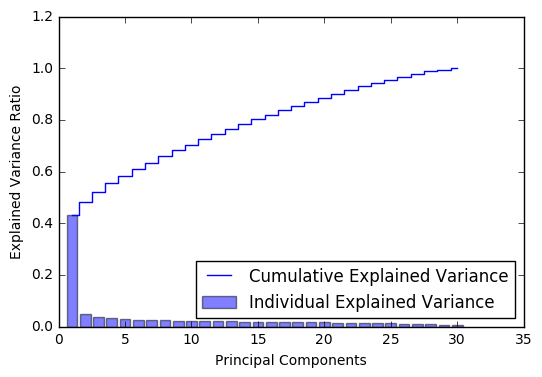

In [16]:
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1,len(var_exp)+1), var_exp, alpha = 0.5, align = 'center',
        label = 'Individual Explained Variance')
plt.step(range(1,len(var_exp)+1), cum_var_exp, where='mid',
        label = 'Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.show()

In [17]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) 
              for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)

W = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print(W.shape)

f1 = X.dot(W[:,0])
f2 = X.dot(W[:,1])

(30, 2)


In [18]:
y =  df['AAPL'].shift(-1)
print(y)
# next day's returns????????????
y = y.fillna(0)
y = np.where(y > 0, 1, -1)

X = df.values
print(y)
print(type(X),type(y))
print(X.shape, y.shape)


Date
2011-11-08   -0.026955
2011-11-09   -0.025450
2011-11-10   -0.001558
2011-11-11   -0.013936
2011-11-14    0.025233
2011-11-15   -0.010442
2011-11-16   -0.019128
2011-11-17   -0.006545
2011-11-18   -0.015816
2011-11-21    0.020325
2011-11-22   -0.025285
2011-11-23   -0.009319
2011-11-25    0.034519
2011-11-28   -0.007764
2011-11-29    0.024116
2011-11-30    0.014992
2011-12-01    0.004563
2011-12-02    0.008494
2011-12-05   -0.005242
2011-12-06   -0.004758
2011-12-07    0.004035
2011-12-08    0.007577
2011-12-09   -0.004522
2011-12-12   -0.007733
2011-12-13   -0.022170
2011-12-14   -0.003288
2011-12-15    0.005489
2011-12-16    0.003123
2011-12-19    0.035949
2011-12-20    0.001263
                ...   
2016-09-26    0.001860
2016-09-27    0.007605
2016-09-28   -0.015533
2016-09-29    0.007755
2016-09-30   -0.004688
2016-10-03    0.004266
2016-10-04    0.000443
2016-10-05    0.007430
2016-10-06    0.001493
2016-10-07    0.017447
2016-10-10    0.002154
2016-10-11    0.008942
2016-1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#import warnings
#warnings.filterwarnings("ignore")

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score

names = ["Perceptron",
         "LogisticRegression",
         "Linear SVM", 
         "Decision Tree", 
         "Random Forest", 
         "RBF SVM",          
         "Neural Net", 
         "Naive Bayes",  
         "Nearest Neighbors"] 

classifiers = [
    Perceptron(),
    LogisticRegression(),
    SVC(kernel="linear", C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1),
    SVC(kernel='rbf',gamma=2, C=1),
    MLPClassifier(hidden_layer_sizes=(100,50), alpha=1),
    GaussianNB(),
    KNeighborsClassifier(5)]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, 
                            random_state=0)

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("Algo: {0:<20s} and Score: {1:0.4f}".format(name, score))

In [ ]:
from sklearn.model_selection import cross_val_score

for name, clf in zip(names, classifiers):    
    scores = cross_val_score(clf, X, y, cv=10)
    print("Algo: {0:<20s} and Score: {1:0.4f}".format(name, np.mean(scores)))


In [ ]:
#